# Power of Signal

* [1.3.2.c Interpreting a DFT plot](https://www.coursera.org/learn/dsp1/lecture/Mrwua?t=107)

> The square magnitude of the k-th DFT coefficient gives an indication of the energy associated to the frequency (2π/N)*k that composes a signal. The signal's energy at a given frequency is proportional to the magnitude of the DFT coefficient at that point.

> <img src="image/parseval_theorem.png" align="left" width=600/>

In [1]:
from typing import (
    Callable
)
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.fft import (
    rfft, 
    rfftfreq
)
import torch

from IPython.display import (
    Audio, 
    display
)

# Constant

In [2]:
FREQUENCY: float = 128
SAMPLING_RATE: int = 8000
DURATION: float = 3

# Function

In [3]:
def f(x):
    return np.sin(FREQUENCY * 2 * np.pi * x)

In [4]:
def f_amplitude(x):
    return np.abs(f(x))

In [5]:
def generate_samples(sampling_rate: float, seconds: float, func: Callable):
    x = np.linspace(0, seconds, int(sampling_rate * seconds), endpoint=False)
    return x, func(x)

In [6]:
x, y = generate_samples(sampling_rate=SAMPLING_RATE, seconds=DURATION, func=f)

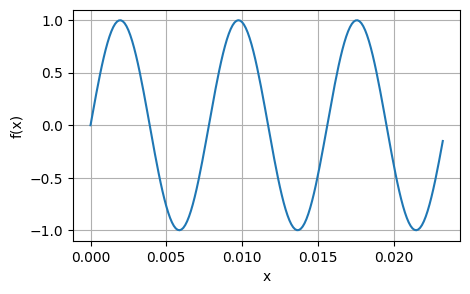

In [15]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], y[:int(len(x) / FREQUENCY)])
plt.show()

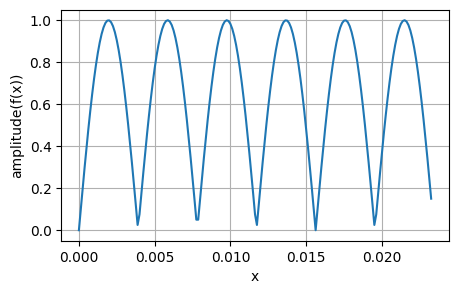

In [8]:
plt.figure(figsize=(5,3))
plt.xlabel('x')
plt.ylabel('amplitude(f(x))')
plt.grid()
plt.plot(x[:int(len(x) / FREQUENCY)], f_amplitude(x)[:int(len(x) / FREQUENCY)])
# plt.plot(x, f_amplitude(x))
plt.show()

# Integral of the discrete signal function 

# $\int_{0}^{T} | f(x) |$

In [9]:
area, delta = quad(f_amplitude, 0, DURATION)
area / DURATION

/var/folders/_4/8v285hqs45xfzk0l1nlr3yq40000gn/T/ipykernel_63928/3621920588.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  area, delta = quad(f_amplitude, 0, DURATION)


0.6279873137189033

# FFT

In [10]:
N = len(x)
assert N == int(SAMPLING_RATE * DURATION)

# Frequencies
xf = rfftfreq(
    n=N,             # window length
    d=(1/SAMPLING_RATE)    # delta(t) = sample spacing.
)

# Manitude
yf = np.abs(rfft(x=y, n=len(x))) / N

# Amplitude
a = 2 * yf

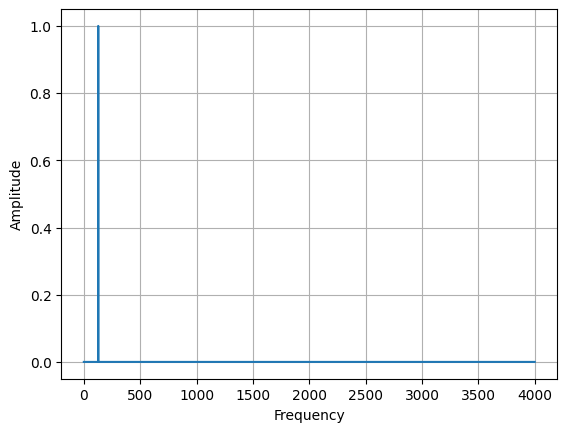

In [11]:
plt.plot(xf, a)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Power

$
P = A^2 / 2
$

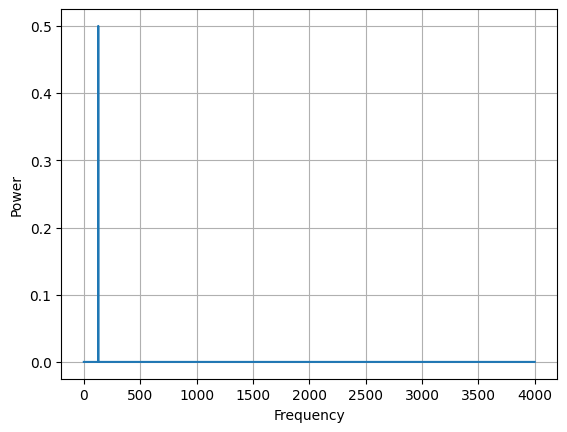

In [16]:
p = np.power(a, 2) / 2
plt.plot(xf, p)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()
plt.show()

In [23]:
A = 10
P = A ** 2

10 * np.log10(P) == 20 * np.log10(A)

True